<a href="https://colab.research.google.com/github/ItsSushant008/Expense_Tracker/blob/main/.World_Popylation_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Load dataset
data = pd.read_csv("/content/world_population.csv")

# Clean column names
data.columns = data.columns.str.strip()
data = data.dropna()

# Extract population columns
pop_data = data[['Country', '2022 Population', '2020 Population', '2015 Population',
                 '2010 Population', '2000 Population', '1990 Population',
                 '1980 Population', '1970 Population']]

Top 5 Most Populated Countries in 2022:
      Country  Population (Billion)
        China              1.425887
        India              1.417173
United States              0.338290
    Indonesia              0.275501
     Pakistan              0.235825


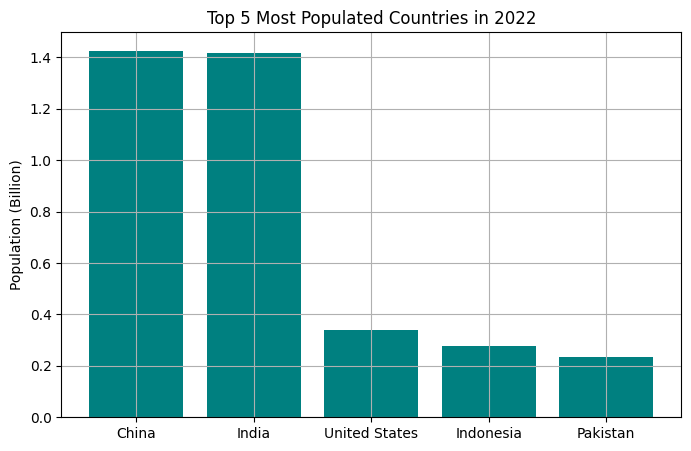

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert population to billions and sort
top5 = data[['Country', '2022 Population']] \
    .sort_values(by='2022 Population', ascending=False) \
    .head(5)

top5['Population (Billion)'] = top5['2022 Population'] / 1e9

# Display the table
print("Top 5 Most Populated Countries in 2022:")
print(top5[['Country', 'Population (Billion)']].to_string(index=False))

# Optional: Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(top5['Country'], top5['Population (Billion)'], color='teal')
plt.title("Top 5 Most Populated Countries in 2022")
plt.ylabel("Population (Billion)")
plt.grid(True)

In [14]:
# Reshape and clean
long_data = pd.melt(pop_data, id_vars=['Country'], var_name='Year', value_name='Population')
long_data['Year'] = long_data['Year'].str.extract('(\d+)').astype(int)
long_data = long_data.sort_values(by=['Country', 'Year'])


In [6]:
# Display first 10 rows of the reshaped and cleaned data
print("Reshaped Population Data (Long Format):")
print(long_data.head(10))

Reshaped Population Data (Long Format):
          Country  Year  Population
1638  Afghanistan  1970    10752971
1404  Afghanistan  1980    12486631
1170  Afghanistan  1990    10694796
936   Afghanistan  2000    19542982
702   Afghanistan  2010    28189672
468   Afghanistan  2015    33753499
234   Afghanistan  2020    38972230
0     Afghanistan  2022    41128771
1639      Albania  1970     2324731
1405      Albania  1980     2941651


In [20]:
top_countries = ['China', 'India', 'United States', 'Brazil', 'Nigeria']
country_data = long_data[long_data['Country'].isin(top_countries)]

forecast_2100 = {}

for country in top_countries:
    df = country_data[country_data['Country'] == country]
    X = df[['Year']]
    y = df['Population']

    model = LinearRegression()
    model.fit(X, y)

    pop_2100 = model.predict([[2100]])[0]
    forecast_2100[country] = int(pop_2100)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


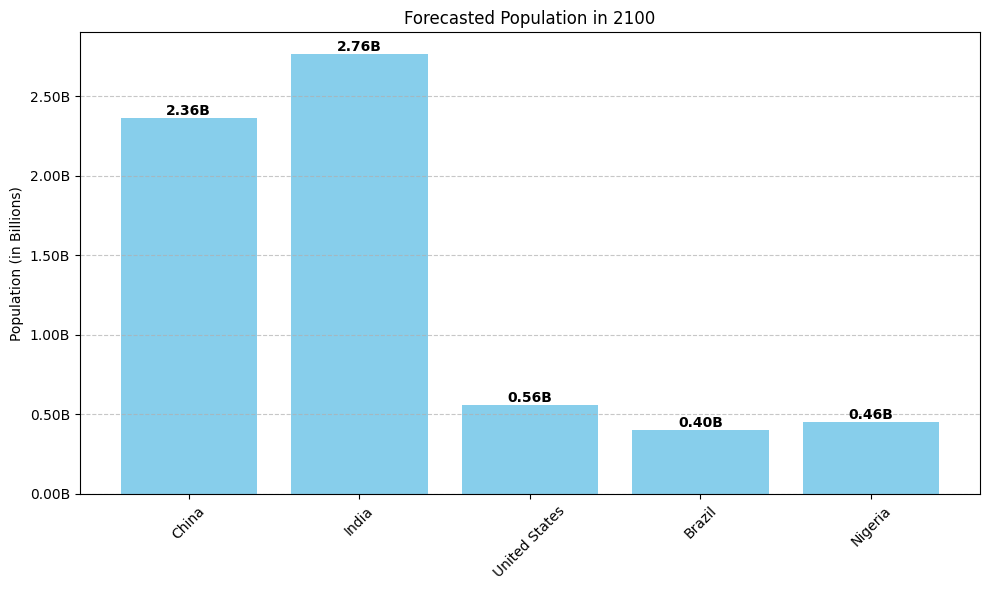

In [17]:
plt.figure(figsize=(10, 6))
bars = plt.bar(forecast_2100.keys(), forecast_2100.values(), color='skyblue')

plt.ylabel("Population (in Billions)")
plt.title("Forecasted Population in 2100")

# Format y-axis in billions
import matplotlib.ticker as ticker
formatter = ticker.FuncFormatter(lambda x, _: f'{x / 1e9:.2f}B')
plt.gca().yaxis.set_major_formatter(formatter)

# Add exact values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height / 1e9:.2f}B',  # Format in billions
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
global_data = long_data.groupby('Year')['Population'].sum().reset_index()
X = global_data[['Year']]
y = global_data['Population']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
future_years = pd.DataFrame({'Year': np.arange(2023, 2101)})
future_years['Predicted Population'] = model.predict(future_years)

In [30]:
print(global_data.head())
print(future_years.head())

   Year  Population
0  1980  4442400371
1  1990  5314191665
2  2000  6147055703
3  2010  6983784998
4  2015  7424809761
   Year  Predicted Population
0  2023          8.078023e+09
1  2024          8.161811e+09
2  2025          8.245598e+09
3  2026          8.329386e+09
4  2027          8.413174e+09


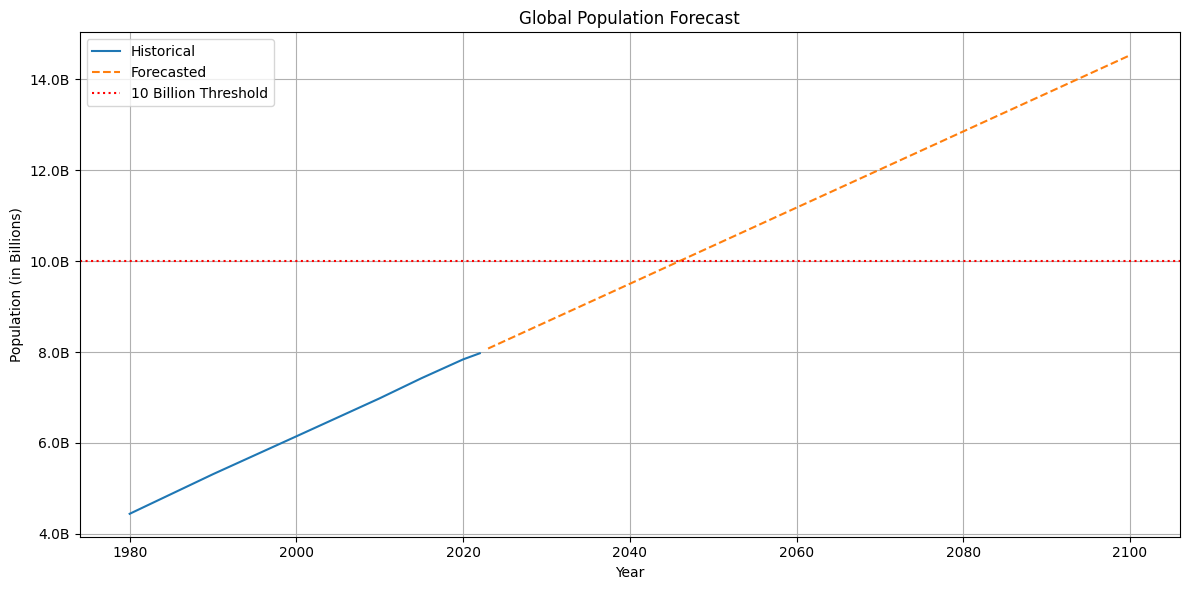

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

global_data['Year'], global_data['Population']
future_years['Year'], future_years['Predicted Population']


# Plot global forecast
plt.figure(figsize=(12,6))

# Historical and forecast lines
plt.plot(global_data['Year'], global_data['Population'], label='Historical')
plt.plot(future_years['Year'], future_years['Predicted Population'], linestyle='--', label='Forecasted')

# 10 Billion Threshold line
plt.axhline(10_000_000_000, color='red', linestyle=':', label='10 Billion Threshold')

# Titles and labels
plt.title("Global Population Forecast")
plt.xlabel("Year")
plt.ylabel("Population (in Billions)")

# Format y-axis ticks to billions
formatter = ticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B')
plt.gca().yaxis.set_major_formatter(formatter)

# Grid, legend, layout
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


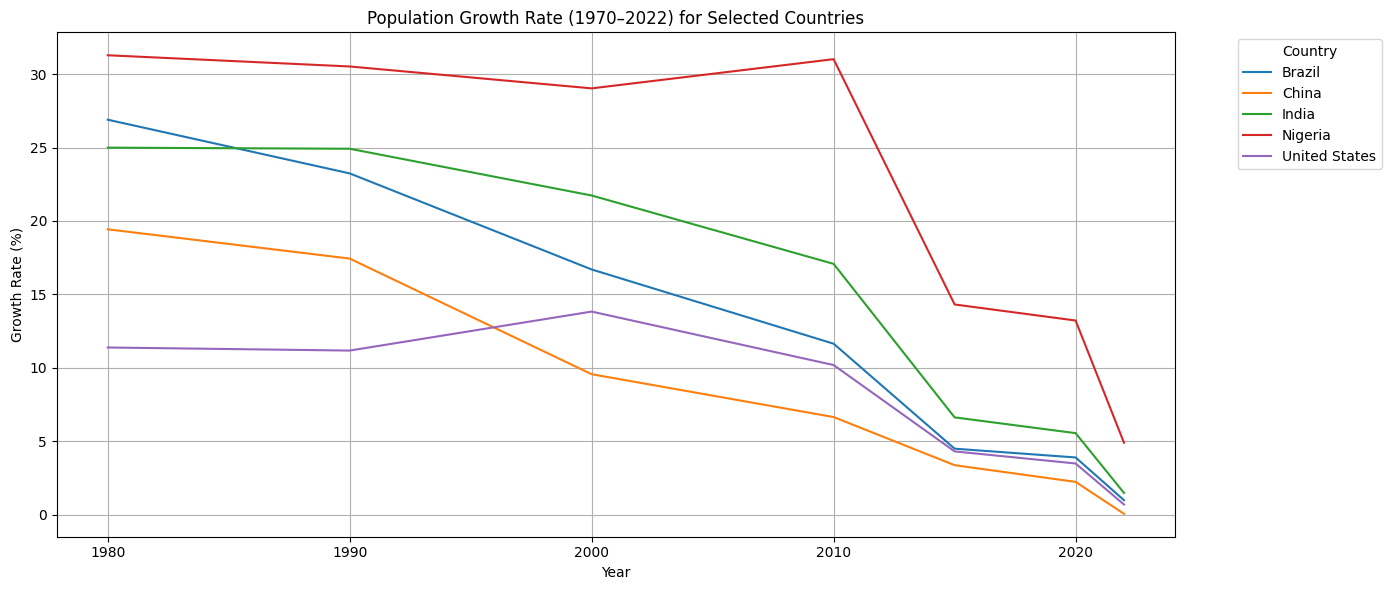

In [23]:
long_data['GrowthRate (%)'] = long_data.groupby('Country')['Population'].pct_change() * 100
long_data = long_data.dropna()

selected_countries = ['United States', 'India', 'China', 'Brazil', 'Nigeria']
filtered_data = long_data[long_data['Country'].isin(selected_countries)]

plt.figure(figsize=(14,6))
sns.lineplot(data=filtered_data, x='Year', y='GrowthRate (%)', hue='Country')
plt.title('Population Growth Rate (1970–2022) for Selected Countries')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

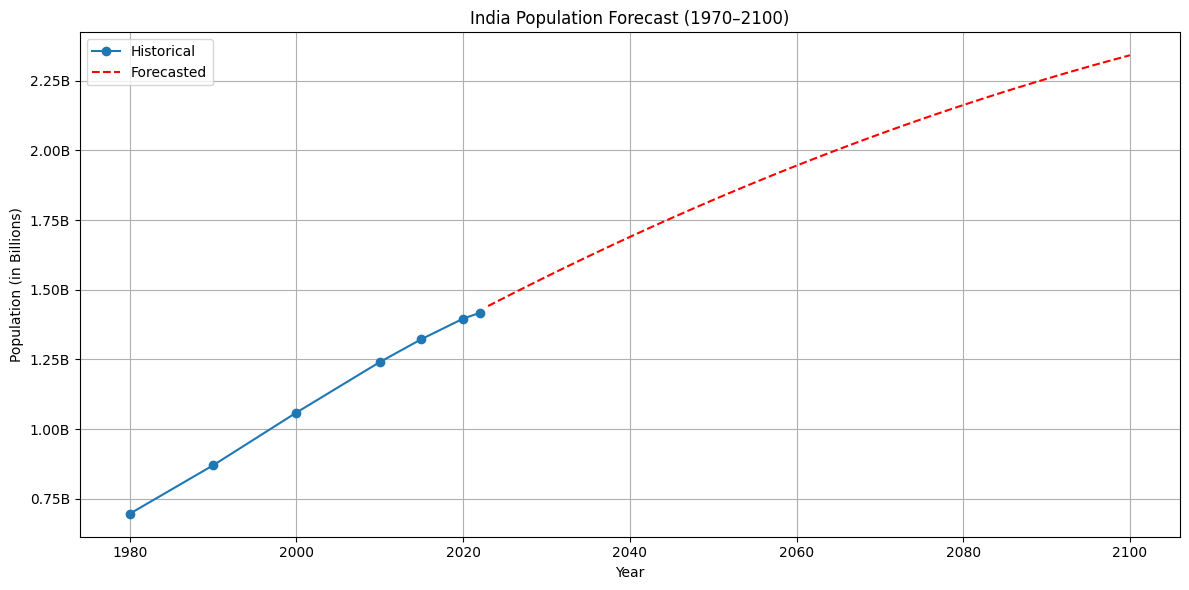

In [34]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.ticker as ticker

# Data Preparation
india_data = long_data[long_data['Country'] == 'India'].sort_values(by='Year')
X = india_data[['Year']]
y = india_data['Population']

# Polynomial Regression (Degree 2 to reduce dip)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Forecast
future_years = pd.DataFrame({'Year': np.arange(2023, 2101)})
X_future_poly = poly.transform(future_years)
future_pred = model.predict(X_future_poly)

# Clip population to not fall below 1B (safety bound)
future_pred = np.maximum(future_pred, 1e9)

# Highlight decline after 2060
decline_mask = (future_years['Year'] >= 2060) & (np.gradient(future_pred) < 0)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(india_data['Year'], y, 'o-', label='Historical')
plt.plot(future_years['Year'], future_pred, 'r--', label='Forecasted')

plt.title("India Population Forecast (1970–2100)")
plt.xlabel("Year")
plt.ylabel("Population (in Billions)")

# Format y-axis ticks to billions
formatter = ticker.FuncFormatter(lambda x, _: f'{x/1e9:.2f}B')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# Filter countries with area greater than 10,000 km²
land_only = data[data['Area (km²)'] > 10000]

# Sort by population density
land_density = land_only[['Country', 'Area (km²)', '2022 Population', 'Density (per km²)']] \
                .sort_values(by='Density (per km²)', ascending=False)

land_density.head(10)

,Country,Area (km²),2022 Population,Density (per km²)
16,Bangladesh,147570,171186372,1160.0350
203,Taiwan,36193,23893394,660.1662
112,Lebanon,10452,5489739,525.2334
172,Rwanda,26338,13776698,523.0731
194,South Korea,100210,51815810,517.0722
32,Burundi,27834,12889576,463.0874
98,Israel,20770,9038309,435.1617
92,India,3287590,1417173173,431.0675
144,Netherlands,41850,17564014,419.6897
87,Haiti,27750,11584996,417.4773


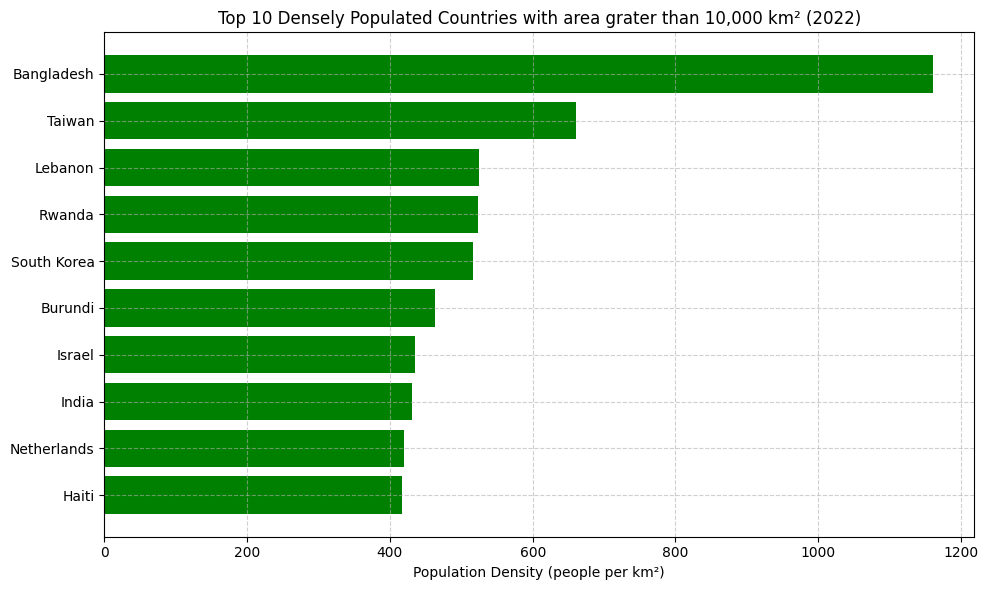

In [42]:
import matplotlib.pyplot as plt

top_land_density = land_only.sort_values(by='Density (per km²)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_land_density['Country'], top_land_density['Density (per km²)'], color='green')
plt.xlabel('Population Density (people per km²)')
plt.title('Top 10 Densely Populated Countries with area grater than 10,000 km² (2022)')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [43]:
# Filter countries with area greater than 1,000,000 km²
land_only = data[data['Area (km²)'] > 1000000]

# Sort by population density
land_density = land_only[['Country', 'Area (km²)', '2022 Population', 'Density (per km²)']] \
                .sort_values(by='Density (per km²)', ascending=False)

land_density.head(10)

,Country,Area (km²),2022 Population,Density (per km²)
92,India,3287590,1417173173,431.0675
41,China,9706961,1425887337,146.8933
93,Indonesia,1904569,275501339,144.6529
63,Ethiopia,1104300,123379924,111.7268
57,Egypt,1002450,110990103,110.7188
131,Mexico,1964375,127504125,64.9082
94,Iran,1648195,88550570,53.7258
193,South Africa,1221037,59893885,49.0517
42,Colombia,1141748,51874024,45.4339
55,DR Congo,2344858,99010212,42.2244


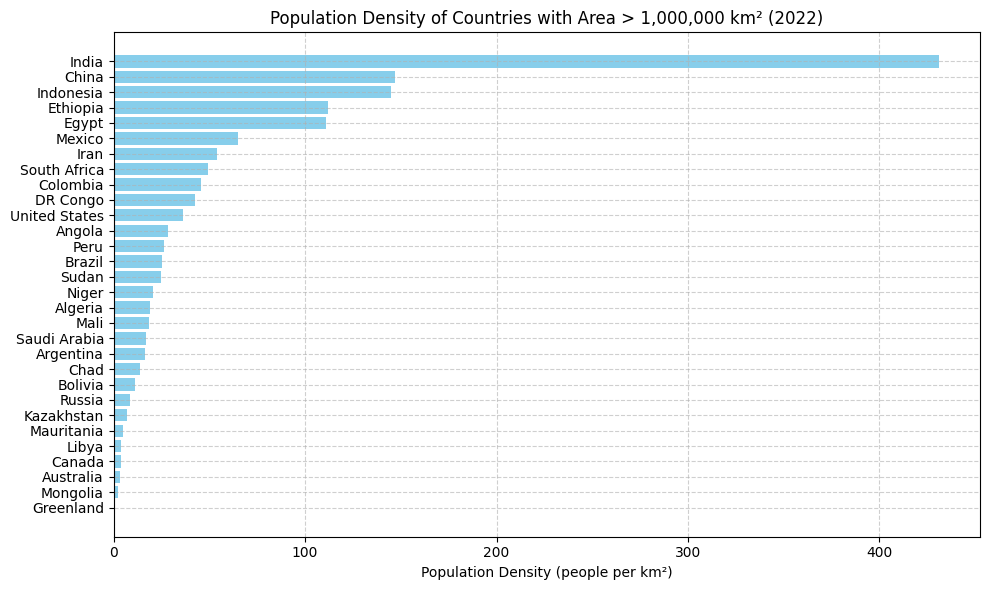

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter countries with area > 1,000,000 km²
land_only = data[data['Area (km²)'] > 1_000_000]

# Sort by population density
land_density = land_only[['Country', 'Area (km²)', '2022 Population', 'Density (per km²)']] \
    .sort_values(by='Density (per km²)', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(land_density['Country'], land_density['Density (per km²)'], color='skyblue')

plt.xlabel('Population Density (people per km²)')
plt.title('Population Density of Countries with Area > 1,000,000 km² (2022)')
plt.gca().invert_yaxis()  # Highest density on top
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

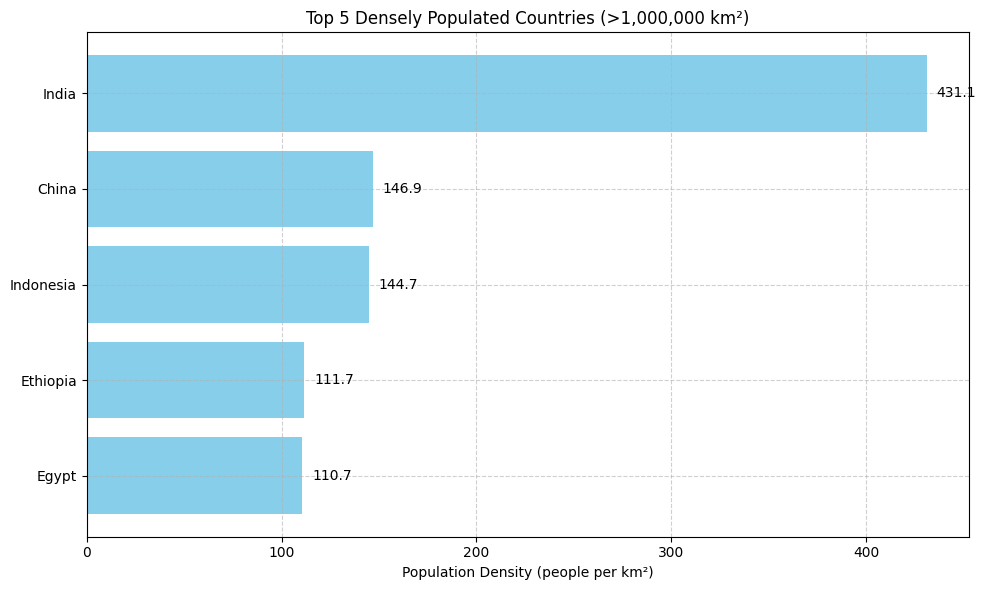

In [48]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter countries with area > 1,000,000 km²
land_only = data[data['Area (km²)'] > 1_000_000]

# Sort by population density and select top 5
land_density = land_only[['Country', 'Area (km²)', '2022 Population', 'Density (per km²)']]
land_density = land_density.sort_values(by='Density (per km²)', ascending=False)
top5_land_density = land_density.head(5)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top5_land_density['Country'], top5_land_density['Density (per km²)'], color='skyblue')

# Add labels
plt.xlabel('Population Density (people per km²)')
plt.title('Top 5 Densely Populated Countries (>1,000,000 km²)')

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Highest density at the top
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

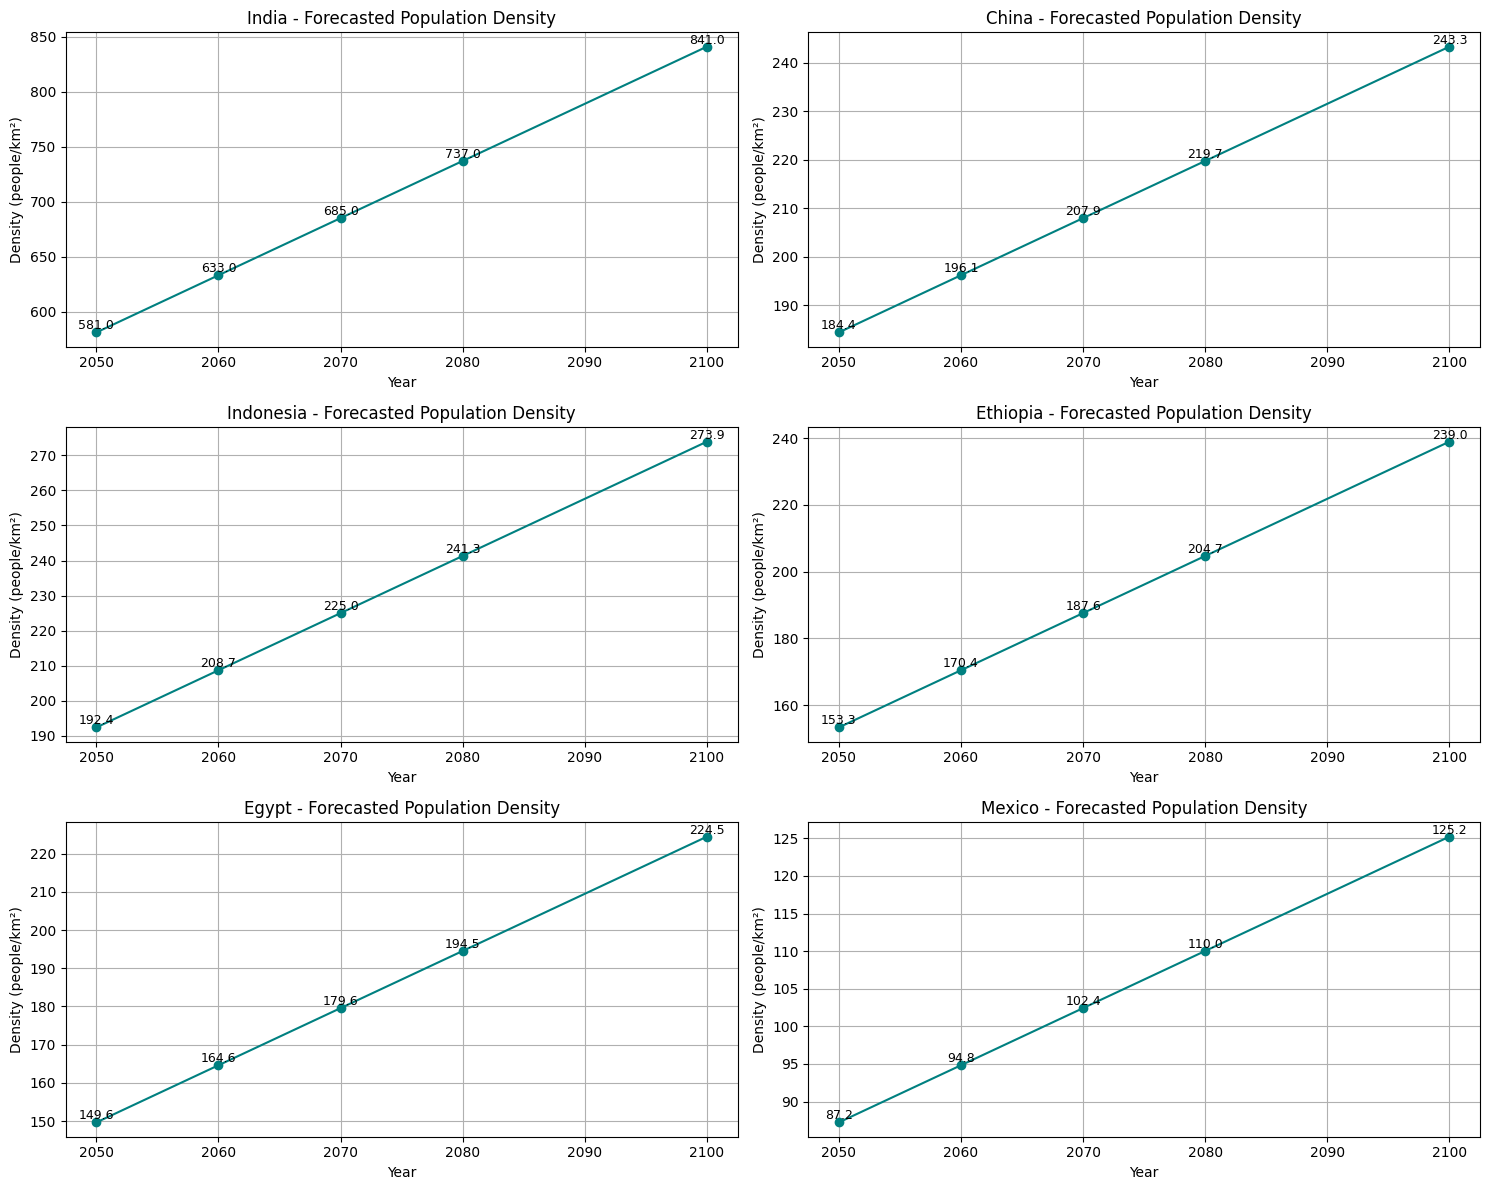

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Filter countries with area > 1,000,000 km² and get top 6 by 2022 density
land_only = data[data['Area (km²)'] > 1_000_000]
top5_land_density = land_only.sort_values(by='Density (per km²)', ascending=False).head(6)

# Years for prediction
future_years = np.array([2050, 2060, 2070, 2080, 2100]).reshape(-1, 1)

# Initialize dictionary to hold forecasted densities
density_forecasts = {}

for country in top5_land_density['Country']:
    row = data[data['Country'] == country]
    pop_cols = [col for col in row.columns if 'Population' in col and col[:4].isdigit()]

    # Extract years and corresponding population values
    years = np.array([int(col[:4]) for col in pop_cols]).reshape(-1, 1)
    population = row[pop_cols].values.flatten().reshape(-1, 1)

    # Linear regression model
    model = LinearRegression()
    model.fit(years, population)

    # Forecast future population
    future_population = model.predict(future_years).flatten()
    area = row['Area (km²)'].values[0]

    # Calculate density
    future_density = future_population / area
    density_forecasts[country] = future_density

# ----------------- PLOTTING ------------------
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, (country, densities) in enumerate(density_forecasts.items()):
    ax = axes[i]
    ax.plot(future_years.flatten(), densities, marker='o', linestyle='-', color='teal')
    ax.set_title(f'{country} - Forecasted Population Density')
    ax.set_xlabel('Year')
    ax.set_ylabel('Density (people/km²)')
    ax.grid(True)

    # Annotate values
    for x, y in zip(future_years.flatten(), densities):
        ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=9)

# Remove extra subplot if not needed
if len(density_forecasts) < len(axes):
    for j in range(len(density_forecasts), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
